In [1]:
import pandas as pd
df = pd.read_csv('Review.csv')
df.head()

,Unnamed: 0,index,Review,sentiment
0,0,1,Great for the jawbone.,1
1,1,3,The mic is great.,1
2,2,6,If you are Razr owner...you must have this!,1
3,3,9,And the sound quality is great.,1
4,4,10,He was very impressed when going from the orig...,1


In [2]:
df.isnull().sum()

Unnamed: 0    0
index         0
Review        0
sentiment     0
dtype: int64

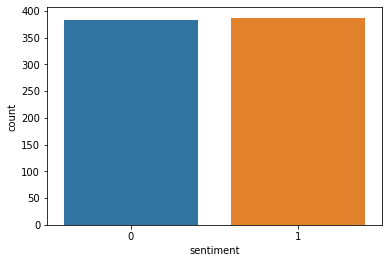

In [5]:
import seaborn as sns
sns.countplot(data = df, x = 'sentiment')

In [6]:
#Data cleaning and preprocessing
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Review'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    

In [7]:
    
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values



In [8]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### MultinomialNB

In [159]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
MB = MultinomialNB().fit(X_train, y_train)

y_pred = MB.predict(X_test)

In [104]:
from sklearn.metrics import classification_report

naive_bayes = classification_report(y_pred,y_test)
print(naive_bayes)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81        64
           1       0.89      0.81      0.85        90

    accuracy                           0.83       154
   macro avg       0.83      0.84      0.83       154
weighted avg       0.84      0.83      0.83       154



In [161]:
from sklearn.metrics import precision_score
ps = precision_score(y_test,y_pred)
print(ps)

0.8111111111111111


In [162]:
from sklearn.metrics import recall_score
re = recall_score(y_test,y_pred)
print(re)

0.8902439024390244


In [163]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test,y_pred)
print(F1)

0.8488372093023255


In [160]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print(ac)

0.8311688311688312


### LogisticRegression

In [168]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X_train, y_train)

pr = lg.predict(X_test)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
from sklearn.metrics import classification_report

cr = classification_report(pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        86
           1       0.76      0.91      0.83        68

    accuracy                           0.83       154
   macro avg       0.84      0.84      0.83       154
weighted avg       0.85      0.83      0.83       154



In [108]:
from sklearn.metrics import precision_score
pc1 = precision_score(pred,y_test)
print(pc1)

0.7560975609756098


In [109]:
from sklearn.metrics import recall_score
rs1 = recall_score(pred,y_test)
print(rs1)

0.9117647058823529


In [110]:
from sklearn.metrics import f1_score
f1 = f1_score(pred,y_test)
print(f1)

0.8266666666666665


In [171]:
from sklearn.metrics import accuracy_score
LogisticRegression = accuracy_score(pr,y_test)
print(LogisticRegression)

0.8311688311688312


### AdaBoostClassifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier().fit(X_train,y_train)
pred_abc = abc.predict(X_test)

In [38]:
from sklearn.metrics import classification_report
cr = classification_report(pred_abc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.72      0.82        94
           1       0.68      0.93      0.79        60

    accuracy                           0.81       154
   macro avg       0.81      0.83      0.80       154
weighted avg       0.84      0.81      0.81       154



In [84]:
from sklearn.metrics import precision_score
ps2= precision_score(pred_abc,y_test)
print(ps2)

0.6829268292682927


In [85]:
from sklearn.metrics import recall_score
ps3= recall_score(pred_abc,y_test)
print(ps3)

0.9333333333333333


In [86]:
from sklearn.metrics import f1_score
f2= f1_score(pred_abc,y_test)
print(f2)

0.7887323943661972


In [63]:
from sklearn.metrics import accuracy_score
AdaBoostClassifier = accuracy_score(pred_abc,y_test)
print(AdaBoostClassifier)

0.8051948051948052


In [43]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier().fit(X_train,y_train)
pred_bc = bc.predict(X_test)

In [44]:
from sklearn.metrics import classification_report

cr = classification_report(pred_bc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        84
           1       0.74      0.87      0.80        70

    accuracy                           0.81       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.81      0.81       154



In [91]:
from sklearn.metrics import precision_score
ps3 = precision_score(pred_bc,y_test)
print(ps3)

0.7439024390243902


In [92]:
from sklearn.metrics import recall_score
rs3 = recall_score(pred_bc,y_test)
print(rs3)

0.8840579710144928


In [93]:
from sklearn.metrics import f1_score
f3 = f1_score(pred_bc,y_test)
print(f3)

0.8079470198675496


In [64]:
from sklearn.metrics import accuracy_score
BaggingClassifier = accuracy_score(pred_bc,y_test)
print(BaggingClassifier)

0.8116883116883117


#### ExtraTreesClassifier

In [152]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier().fit(X_train,y_train)
pred_etc = ExtraTreesClassifier.predict(X_test)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
from sklearn.metrics import classification_report

cr = classification_report(pred_etc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82        86
           1       0.74      0.90      0.81        68

    accuracy                           0.82       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.83      0.82      0.82       154



In [98]:
from sklearn.metrics import precision_score
ps = precision_score(pred_etc,y_test)
print(ps)

0.7560975609756098


In [99]:
from sklearn.metrics import recall_score
rs = recall_score(pred_etc,y_test)
print(rs)

0.8732394366197183


In [100]:
from sklearn.metrics import f1_score
f1 = f1_score(pred_etc,y_test)
print(f1)

0.8104575163398693


In [153]:
from sklearn.metrics import accuracy_score
ExtraTreesClassifier = accuracy_score(pred_etc,y_test)
print(ExtraTreesClassifier)

0.7987012987012987


In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(X_train,y_train)
pred_gbc = gbc.predict(X_test)

In [56]:
from sklearn.metrics import classification_report

cr = classification_report(pred_gbc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.69      0.80        99
           1       0.62      0.93      0.74        55

    accuracy                           0.77       154
   macro avg       0.78      0.81      0.77       154
weighted avg       0.83      0.77      0.78       154



In [112]:
from sklearn.metrics import precision_score
pc = precision_score(pred_gbc,y_test)
print(pc)

0.6219512195121951


In [115]:
from sklearn.metrics import recall_score
rs = recall_score(pred_gbc,y_test)
print(rs)

0.9272727272727272


In [ ]:
from sklearn.metrics import recall_score
rs = recall_score(pred_gbc,y_test)
print(rs)

In [116]:
from sklearn.metrics import f1_score
f = f1_score(pred_gbc,y_test)
print(f)

0.7445255474452553


In [142]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train,y_train)
pred_rfc = rfc.predict(X_test)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [143]:
from sklearn.metrics import classification_report

cr = classification_report(pred_rfc,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.74      0.84        93
           1       0.71      0.95      0.81        61

    accuracy                           0.82       154
   macro avg       0.83      0.85      0.82       154
weighted avg       0.86      0.82      0.83       154



In [144]:
from sklearn.metrics import precision_score
ps = precision_score(pred_rfc,y_test)
print(ps)

0.7073170731707317


In [145]:
from sklearn.metrics import recall_score
rs = recall_score(pred_rfc,y_test)
print(rs)

0.9508196721311475


In [146]:
from sklearn.metrics import f1_score
f4 = f1_score(pred_rfc,y_test)
print(f4)

0.8111888111888113


In [147]:
from sklearn.metrics import accuracy_score
RandomForestClassifier= accuracy_score(pred_rfc,y_test)
print(RandomForestClassifier)

0.8246753246753247


In [9]:
# now plot all the bag of word with stemming results now....
# intialise data of lists. 
data = {'Classifier Name':['MultinomialNB','Logistic Regression', 'Ada Boost Classifier', 'Bagging Classifier', 'Extra Trees Classifier','Gradient Boosting Classifier','Random Forest Classifier'], 
        'Accuracy Score':[0.83,0.83, 0.80, 0.81, 0.79,0.77,0.82],
        'Precision Score':[0.81,0.75, 0.68, 0.74, 0.75,0.62,0.74],
        'Recall Score':[0.89,0.91, 0.93, 0.88, 0.87,0.92,0.89],
        'F1 Score':[0.84,0.82, 0.78, 0.80, 0.81,0.74,0.81]} 

# Create DataFrame 
df1 = pd.DataFrame(data)

In [10]:
df1

,Classifier Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,MultinomialNB,0.83,0.81,0.89,0.84
1,Logistic Regression,0.83,0.75,0.91,0.82
2,Ada Boost Classifier,0.80,0.68,0.93,0.78
3,Bagging Classifier,0.81,0.74,0.88,0.80
4,Extra Trees Classifier,0.79,0.75,0.87,0.81
5,Gradient Boosting Classifier,0.77,0.62,0.92,0.74
6,Random Forest Classifier,0.82,0.74,0.89,0.81


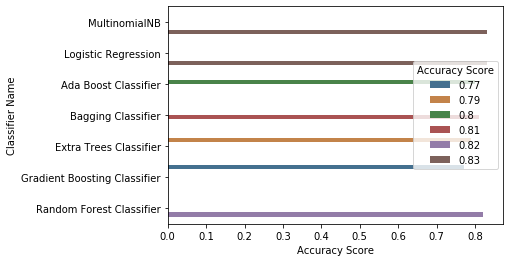

In [11]:
sns.barplot(data = df1,y = 'Classifier Name',x = 'Accuracy Score',hue = 'Accuracy Score', saturation=.5)

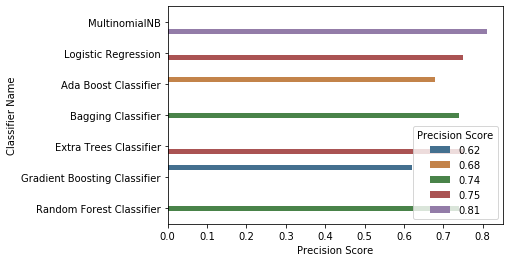

In [12]:
sns.barplot(data = df1,y = 'Classifier Name',x = 'Precision Score',hue = 'Precision Score', saturation=.5)

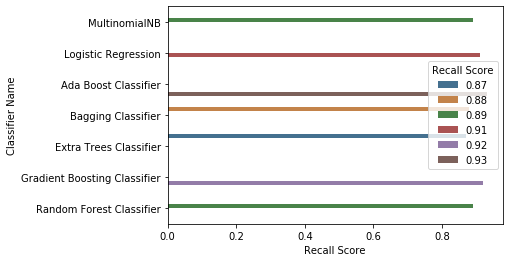

In [14]:
sns.barplot(data = df1,y = 'Classifier Name',x = 'Recall Score',hue = 'Recall Score', saturation=.5)

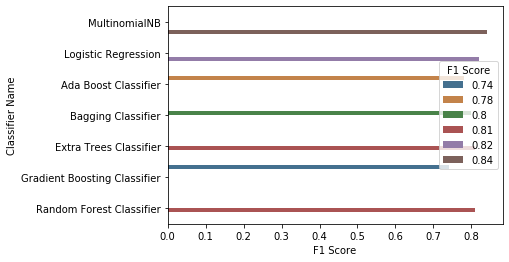

In [15]:
sns.barplot(data = df1,y = 'Classifier Name',x = 'F1 Score',hue = 'F1 Score', saturation=.5)

###  Tfidf model

In [27]:
# Creating the Tfidf model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()

y = pd.get_dummies(df['sentiment'])
y = y.iloc[:,1].values


In [39]:
from sklearn.naive_bayes import MultinomialNB
lg = MultinomialNB().fit(X, y)

pr = lg.predict(X)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pr,y)
accuracy_score

0.9558441558441558

In [42]:
from sklearn.metrics import precision_score
p_score = precision_score(pr,y)
p_score

0.9870801033591732

In [43]:
from sklearn.metrics import recall_score
re_score = recall_score(pr,y)
re_score

0.9294403892944039

In [45]:
from sklearn.metrics import f1_score
f1_score = f1_score(pr,y)
f1_score

0.9573934837092731

In [52]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression().fit(X, y)

pr1 = lg.predict(X)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pr1,y)
accuracy_score

0.961038961038961

In [54]:
from sklearn.metrics import precision_score
pre_score = precision_score(pr1,y)
pre_score

0.958656330749354

In [55]:
from sklearn.metrics import recall_score
recall_score = recall_score(pr1,y)
recall_score

0.9636363636363636

In [56]:
from sklearn.metrics import f1_score
f1_score = f1_score(pr1,y)
f1_score

0.961139896373057

In [59]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier().fit(X,y)
pred_abc = abc.predict(X)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pred_abc,y)
accuracy_score

0.8727272727272727

In [61]:
from sklearn.metrics import precision_score
pre_score = precision_score(pred_abc,y)
pre_score

0.813953488372093

In [62]:
from sklearn.metrics import recall_score
recall_score = recall_score(pred_abc,y)
recall_score

0.9237536656891495

In [63]:
from sklearn.metrics import f1_score
f1_score = f1_score(pred_abc,y)
f1_score

0.8653846153846154

In [64]:
# BaggingClassifier
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier().fit(X,y)
pred_bc = bc.predict(X)

In [65]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pred_bc,y)
accuracy_score

0.9714285714285714

In [66]:
from sklearn.metrics import precision_score
pre_score = precision_score(pred_bc,y)
pre_score

0.9534883720930233

In [67]:
from sklearn.metrics import recall_score
recall_score = recall_score(pred_bc,y)
recall_score

0.9892761394101877

In [68]:
from sklearn.metrics import f1_score
f1_score = f1_score(pred_bc,y)
f1_score

0.9710526315789474

In [71]:
from sklearn.ensemble import ExtraTreesClassifier
ExtraTreesClassifier = ExtraTreesClassifier().fit(X,y)
pred_etc = ExtraTreesClassifier.predict(X)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pred_etc,y)
accuracy_score

0.9948051948051948

In [73]:
from sklearn.metrics import precision_score
pre_score = precision_score(pred_etc,y)
pre_score

0.9896640826873385

In [74]:
from sklearn.metrics import recall_score
recall_score = recall_score(pred_etc,y)
recall_score

1.0

In [75]:
from sklearn.metrics import f1_score
f1_score = f1_score(pred_etc,y)
f1_score

0.9948051948051948

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier().fit(X,y)
pred_gbc = gbc.predict(X)

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pred_gbc,y)
accuracy_score

0.8805194805194805

In [78]:
from sklearn.metrics import precision_score
pre_score = precision_score(pred_gbc,y)
pre_score

0.7751937984496124

In [79]:
from sklearn.metrics import recall_score
recall_score = recall_score(pred_gbc,y)
recall_score

0.9836065573770492

In [80]:
from sklearn.metrics import f1_score
f1_score = f1_score(pred_gbc,y)
f1_score

0.8670520231213873

In [82]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X,y)
pred_rfc = rfc.predict(X)

/Users/Basha/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(pred_rfc,y)
accuracy_score

0.9844155844155844

In [84]:
from sklearn.metrics import precision_score
pre_score = precision_score(pred_rfc,y)
pre_score

0.9741602067183462

In [85]:
from sklearn.metrics import recall_score
recall_score = recall_score(pred_rfc,y)
recall_score

0.9947229551451188

In [86]:
from sklearn.metrics import f1_score
f1_score = f1_score(pred_rfc,y)
f1_score

0.9843342036553524

In [88]:
# now plot all the bag of word with stemming results now....
# intialise data of lists. 
data = {'Classifier Name':['MultinomialNB','Logistic Regression', 'Ada Boost Classifier', 'Bagging Classifier', 'Extra Trees Classifier','Gradient Boosting Classifier','Random Forest Classifier'], 
        'Accuracy Score':[0.95,0.96, 0.87, 0.97, 0.99,0.88,0.98],
        
        'Precision Score':[0.98,0.95, 0.81, 0.95, 0.98,0.77,0.97],
        
        'Recall Score':[0.92,0.96, 0.92, 0.98, 0.98,0.98,0.99],
        
        'F1 Score':[0.95,0.96, 0.86, 0.97, 0.99,0.86,0.98]} 

# Create DataFrame 
df = pd.DataFrame(data)
df

,Classifier Name,Accuracy Score,Precision Score,Recall Score,F1 Score
0,MultinomialNB,0.95,0.98,0.92,0.95
1,Logistic Regression,0.96,0.95,0.96,0.96
2,Ada Boost Classifier,0.87,0.81,0.92,0.86
3,Bagging Classifier,0.97,0.95,0.98,0.97
4,Extra Trees Classifier,0.99,0.98,0.98,0.99
5,Gradient Boosting Classifier,0.88,0.77,0.98,0.86
6,Random Forest Classifier,0.98,0.97,0.99,0.98


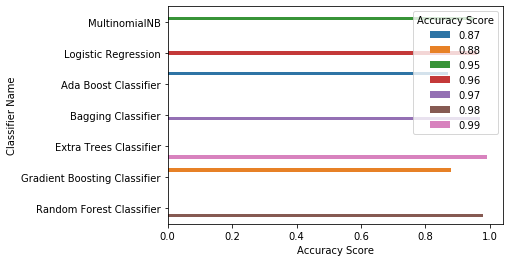

In [91]:
sns.barplot(data = df,y = 'Classifier Name',x = 'Accuracy Score', saturation=.8,hue = 'Accuracy Score')

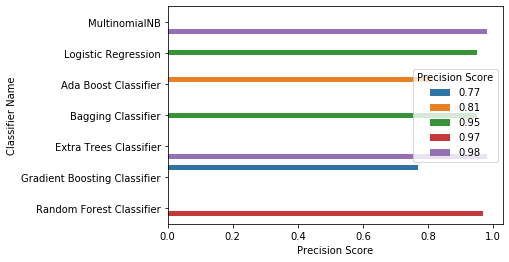

In [93]:
sns.barplot(data = df,y = 'Classifier Name',x = 'Precision Score',hue = 'Precision Score', saturation=.8)

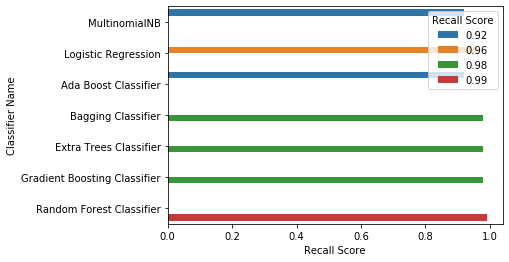

In [96]:
sns.barplot(data = df,y = 'Classifier Name',x = 'Recall Score',hue = 'Recall Score', saturation=.8)

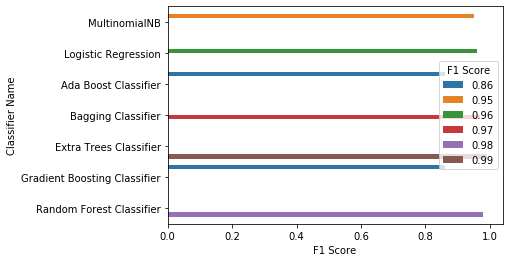

In [100]:
sns.barplot(data = df,y = 'Classifier Name',x = 'F1 Score',hue = 'F1 Score', saturation=.8)